c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.098e+12, tolerance: 1.493e+09
  model = cd_fast.enet_coordinate_descent(


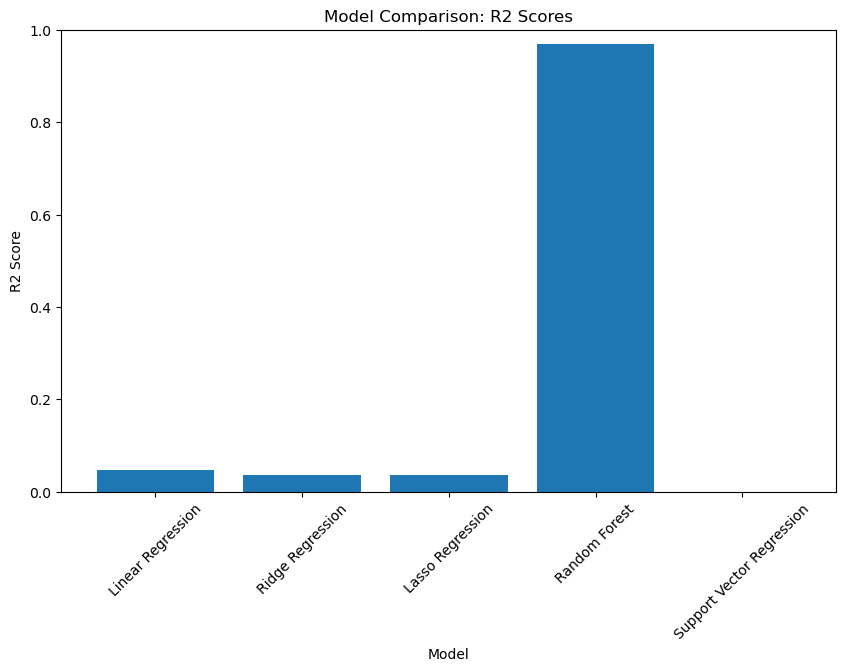

                       Model  R2 Score
0          Linear Regression  0.046306
1           Ridge Regression  0.037126
2           Lasso Regression  0.037398
3              Random Forest  0.969583
4  Support Vector Regression -0.034611


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


file_path = '../Data/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'
data = pd.read_csv(file_path)

features = [
    'Year',
    'Expenditure-Share_of_Govt_spending',
    'Expenditure-Share_of_GDP',
    'index_level',
    'total_score',
    'Deadliness_raw',
    'Diffusion_raw',
    'Danger_raw',
    'Fragmentation_raw',
]
target = 'Expenditure_Constant_2022'

data_cleaned = data[features + [target]].dropna()

X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipelines = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "Ridge Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0))
    ]),
    "Lasso Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=0.1, max_iter=10000))
    ]),
    "Random Forest": Pipeline([
        ('model', RandomForestRegressor(random_state=42, n_estimators=100))
    ]),
    "Support Vector Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(C=1.0, epsilon=0.2))
    ])
}

r2_scores = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_scores[name] = r2_score(y_test, y_pred)

r2_table = pd.DataFrame(r2_scores.items(), columns=['Model', 'R2 Score'])

plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values())
plt.title('Model Comparison: R2 Scores')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

print(r2_table)

In [8]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
file_path = '../Data/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'
data = pd.read_csv(file_path)

# Select numeric columns for aggregation
numeric_columns = data.select_dtypes(include=['number']).columns
subregion_summary = data.groupby('Subregion', as_index=False)[numeric_columns].mean()

# Define approximate coordinates for subregions (manually estimated)
subregion_coordinates = {
    "Southern Africa": [-30, 25],
    "Eastern Africa": [0, 40],
    "Western Africa": [10, -5],
    "Northern Africa": [20, 10],
    "Central Africa": [-2, 20],
    "South America": [-20, -60],
    "North America": [45, -100],
    "Central America": [15, -90],
    "Western Asia": [35, 45],
    "Eastern Asia": [35, 110],
    "South-Eastern Asia": [-5, 120],
    "Southern Asia": [20, 80],
    "Northern Europe": [60, 10],
    "Southern Europe": [40, 20],
    "Eastern Europe": [55, 30],
    "Western Europe": [50, 5],
    "Australia and New Zealand": [-25, 135],
    "Melanesia": [-10, 150],
    "Micronesia": [5, 140],
    "Polynesia": [-15, -140],
    "Middle Africa": [0, 15],
    "Caribbean": [15, -75]
}

# Map the coordinates to the subregion data
subregion_summary['Latitude'] = subregion_summary['Subregion'].map(lambda x: subregion_coordinates.get(x, [0, 0])[0])
subregion_summary['Longitude'] = subregion_summary['Subregion'].map(lambda x: subregion_coordinates.get(x, [0, 0])[1])

# Create a map
fig = go.Figure()

# Add Expenditure-Share_of_Govt_spending as the color metric
fig.add_trace(go.Scattergeo(
    lon=subregion_summary['Longitude'],
    lat=subregion_summary['Latitude'],
    text=subregion_summary['Subregion'] + 
         "<br>Expenditure Per Capita: " + subregion_summary['Expenditure_Per_Capita'].round(2).astype(str) +
         "<br>Share of Govt Spending: " + subregion_summary['Expenditure-Share_of_Govt_spending'].round(4).astype(str),
    marker=dict(
        size=20,
        color=subregion_summary['Expenditure-Share_of_Govt_spending'],
        colorscale='Plasma',
        colorbar=dict(title="Share of Govt Spending"),
        opacity=0.8,
    )
))

# Layout adjustments
fig.update_layout(
    title="Choropleth Map of Expenditure Per Capita and Govt Spending by Subregion",
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
    ),
)

# Show the map
fig.show()


In [ ]:
import folium
from folium.plugins import HeatMap

import pandas as pd
import plotly.graph_objects as go

# Load the dataset
file_path = '../Data/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'
data = pd.read_csv(file_path)

# Select numeric columns for aggregation
numeric_columns = data.select_dtypes(include=['number']).columns
subregion_summary = data.groupby('Subregion', as_index=False)[numeric_columns].mean()
print(subregion_summary)
# Add coordinates for subregions
subregion_coordinates = {
    "Southern Africa": [-30, 25],
    "Eastern Africa": [0, 40],
    "Western Africa": [10, -5],
    "Northern Africa": [20, 10],
    "Central Africa": [-2, 20],
    "South America": [-20, -60],
    "North America": [45, -100],
    "Central America": [15, -90],
    "Western Asia": [35, 45],
    "Eastern Asia": [35, 110],
    "South-Eastern Asia": [-5, 120],
    "Southern Asia": [20, 80],
    "Northern Europe": [60, 10],
    "Southern Europe": [40, 20],
    "Eastern Europe": [55, 30],
    "Western Europe": [50, 5],
    "Australia and New Zealand": [-25, 135],
    "Melanesia": [-10, 150],
    "Micronesia": [5, 140],
    "Polynesia": [-15, -140],
    "Middle Africa": [0, 15],
    "Caribbean": [15, -75]
}

subregion_summary['Latitude'] = subregion_summary['Subregion'].map(lambda x: subregion_coordinates.get(x, [0, 0])[0])
subregion_summary['Longitude'] = subregion_summary['Subregion'].map(lambda x: subregion_coordinates.get(x, [0, 0])[1])

# Prepare data for the HeatMap layer
heat_data = subregion_summary[['Latitude', 'Longitude', 'Expenditure_Per_Capita']].dropna().values.tolist()

# Create a base map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add HeatMap
HeatMap(heat_data, radius=15, max_zoom=10, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 1: 'red'}).add_to(m)

# Add markers for each subregion
for _, row in subregion_summary.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(
            f"<strong>Subregion:</strong> {row['Subregion']}<br>"
            f"<strong>Expenditure Per Capita:</strong> {row['Expenditure_Per_Capita']:.2f}<br>",
            max_width=300
        )
    ).add_to(m)

# Save and display map
# m.save("/mnt/data/subregion_heatmap.html")
m

                            Subregion         Year  \
0   Central America and the Caribbean  2011.483444   
1                      Central Europe  2011.839695   
2                           East Asia  2011.661290   
3                      Eastern Europe  2011.500000   
4                         Middle East  2010.872204   
5                        North Africa  2010.750000   
6                       North America  2011.500000   
7                             Oceania  2011.500000   
8                       South America  2011.500000   
9                          South Asia  2011.630435   
10                    South East Asia  2011.373377   
11                     Western Europe  2011.500000   
12                 sub-Saharan Africa  2011.842685   

    Expenditure-Share_of_Govt_spending  Expenditure-Share_of_GDP  \
0                             0.031641                  0.008520   
1                             0.040860                  0.016087   
2                             0.071839 

In [46]:
import folium
from folium.plugins import HeatMap

# Ensure aggregation is applied only to numeric columns for countries
numeric_columns = data.select_dtypes(include=['number']).columns
country_summary = data.groupby('Country', as_index=False)[numeric_columns].mean()

# Define exact latitude and longitude for the given top countries
country_coordinates = {
    "United States of America": [39.8283, -98.5795],
    "China": [35.8617, 104.1954],
    "Russia": [61.5240, 105.3188],
    "United Kingdom": [55.3781, -3.4360],
    "Saudi Arabia": [23.8859, 45.0792],
    "India": [20.5937, 78.9629],
    "France": [46.6034, 1.8883],
    "Germany": [51.1657, 10.4515],
    "Japan": [36.2048, 138.2529],
    "Korea, South": [35.9078, 127.7669]
}

# Filter the dataset for the top countries
top_countries = data[data['Country'].isin(country_coordinates.keys())]

# Aggregate the numeric columns for the selected countries
numeric_columns = top_countries.select_dtypes(include=['number']).columns
top_countries_summary = top_countries.groupby('Country', as_index=False)[numeric_columns].mean()

# Add latitude and longitude for the selected countries
top_countries_summary['Latitude'] = top_countries_summary['Country'].map(lambda x: country_coordinates[x][0])
top_countries_summary['Longitude'] = top_countries_summary['Country'].map(lambda x: country_coordinates[x][1])

# Prepare data for the HeatMap layer
heat_data = top_countries_summary[['Latitude', 'Longitude', 'Expenditure-Share_of_Govt_spending']].dropna().values.tolist()

# Create a base map
m = folium.Map(location=[15, 0], zoom_start=2)

# Add HeatMap for the top countries
HeatMap(heat_data, radius=30, max_zoom=10, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 1: 'red'}).add_to(m)

m
